In [1]:
from tinc import *

In [2]:
class CASMViewer(TincBridge):
    def __init__(self, casm_viewer_exec):
        import os
        super().__init__(casm_viewer_exec, os.path.dirname(os.path.abspath(casm_viewer_exec)))
        self.launch()
        self._dp = None
        
    def load_dataset(self, dataset):
        self.get_parameter("dataset").value = dataset
        # TODO block until dataset has completed loading
        
    def print_parameter_space(self):
        ps = self.get_parameter_space("casmParameters")
        for p in ps.get_dimensions():
            print(f'Parameter: {p.id} values: {p.values}')
    
    def set_parameter_value(self, parameter_name, value):
        cv.get_parameter(parameter_name).value = value
        # TODO block until change has settled
        
    def list_results_fields(self):
        if self._dp is None:
            self._dp = self.get_datapool("resultsData")
        return self._dp.list_fields()
    
    def get_results_slice(self, field, dimension):
        if self._dp is None:
            self._dp = self.get_datapool("resultsData")
        return self._dp.get_slice(field, dimension)
    
    def send_plot(self, index = 1):
        g = self.get_disk_buffer(f"graph{index}")
        name = g.get_filename_for_writing()
        savefig(name);
        g.done_writing_file(name)
        
    def set_plot_function(self, func, index = 1, params = ["T", "param_chem_pot(a)", "param_chem_pot(b)"]):
        # TODO check if function has not been already added. if it has, remove old one
        def cb(value):
            clf()
            func()
            self.send_plot(index)
        for pname in params:
            p = self.get_parameter(pname)
            if p is not None:
                p.register_callback_async(cb)


In [3]:
cv = CASMViewer(r"C:\Users\Andres\source\repos\casm_viewer\bin\casm_viewer.exe")

Connected to localhost:34450. Server version 1 revision 0
Set working path to C:\Users\Andres\source\repos\casm_viewer\bin\
Unknown message
Updated processor 'ParameterSpaceProcessor'
Updated processor 'ShellSiteFileAnalyzer'
Updated processor 'TransfmatExtractor'
Updated processor 'TemplateGenerator'
Updated processor 'PrepareDataset'
Updated processor 'AtomLabelProcessor'
Updated processor 'GraphGenerator'
Updated processor 'SampleComputation'
Unknown message


The CASMViewer object inherits from TincClient, so any operations that you would normally do through TincClient are available. However the most common operations for CASM datasets have been exposed through a simple API, for example for loading datasets:

In [4]:
cv.load_dataset(r"C:\Users\Andres\source\repos\vdv_data\MonteCarlo_0")

Validating json with C:\Users\Andres\anaconda3\envs\casm\lib\site-packages\tinc\tinc_cache_schema.json
Disk buffer could not load file C:\Users\Andres\source\repos\casm_viewer\bin\/graph.png


For finding details about the current parameter space:

In [5]:
cv.print_parameter_space()

Parameter: T values: [300. 350. 400. 450. 500.]
Parameter: param_chem_pot(a) values: [-25.  -24.5 -24.  -23.5 -23.  -22.5 -22.  -21.5 -21.  -20.5 -20.  -19.5
 -19.  -18.5 -18.  -17.5 -17.  -16.5 -16.  -15.5 -15.  -14.5 -14.  -13.5
 -13.  -12.5 -12.  -11.5 -11.  -10.5 -10.   -9.5  -9.   -8.5  -8.   -7.5
  -7.   -6.5  -6.   -5.5  -5.   -4.5  -4.   -3.5  -3.   -2.5  -2.   -1.5
  -1.   -0.5   0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5
   5.    5.5   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5
  11.   11.5  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5
  17.   17.5  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5
  23.   23.5  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5
  29.   29.5  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5
  35. ]


Slicing through the results.json files (the datapool object is handled internally)

In [6]:
cv.list_results_fields()

AttributeError: 'DataPool' object has no attribute 'list_fields_in_file'

In [7]:
cv.set_parameter_value("param_chem_pot(a)", -19.0)

Disk buffer could not load file C:\Users\Andres\source\repos\casm_viewer\bin\/graph.png


In [8]:
cv.get_results_slice('<comp_n(Li)>', 'T')

masked_array(data=[1.53380581, 1.58114573, 1.62689157, 1.66634068,
                   1.70241608],
             mask=False,
       fill_value=1e+20)

In [9]:
cv.set_parameter_value("param_chem_pot(a)", 35.0)

Disk buffer could not load file C:\Users\Andres\source\repos\casm_viewer\bin\/graph.png


In [10]:
cv.get_results_slice('<comp_n(Li)>', 'T')

masked_array(data=[19.0249767 , 19.05860816, 19.11721529, 19.1718959 ,
                   19.21824724],
             mask=False,
       fill_value=1e+20)

Drawing to the plots in the CASMViewer gui

In [11]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Andres\anaconda3\envs\casm\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['unique', 'interactive']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


sent disk buffer filename: currentGraph1.png


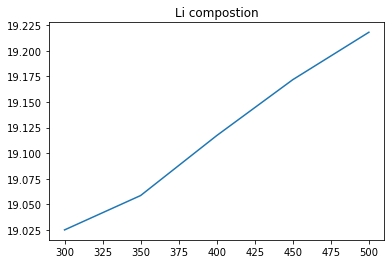

In [12]:
slice = cv.get_results_slice('<comp_n(Li)>', 'T')
plot(cv.get_parameter("T").values, slice)
title("Li compostion")
cv.send_plot()

In [13]:
cv.set_parameter_value("param_chem_pot(a)", -19.0)

Disk buffer could not load file C:\Users\Andres\source\repos\casm_viewer\bin\/graph.png


sent disk buffer filename: currentGraph1.png


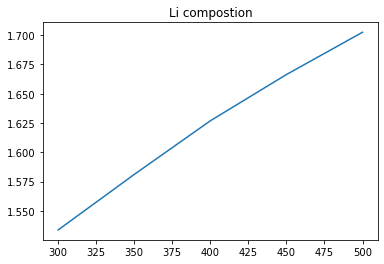

In [14]:
slice = cv.get_results_slice('<comp_n(Li)>', 'T')
plot(cv.get_parameter("T").values, slice)
title("Li compostion")
cv.send_plot()

Disk buffer could not load file C:\Users\Andres\source\repos\casm_viewer\bin\/graph.png
Disk buffer could not load file C:\Users\Andres\source\repos\casm_viewer\bin\/graph.png
sent disk buffer filename: currentGraph3.png


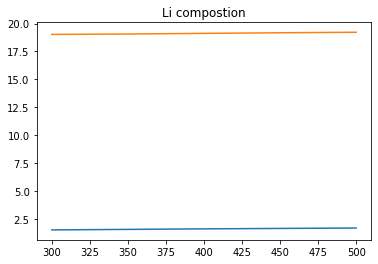

In [11]:
cv.set_parameter_value("param_chem_pot(a)", -19.0)
slice1 = cv.get_results_slice('<comp_n(Li)>', 'T')
cv.set_parameter_value("param_chem_pot(a)", 35.0)
slice2 = cv.get_results_slice('<comp_n(Li)>', 'T')

plot(cv.get_parameter("T").values, slice1)
plot(cv.get_parameter("T").values, slice2)
title("Li compostion")
cv.send_plot(3)

Updating the graph on changes

In [ ]:
vlines

In [ ]:
%pylab inline

In [15]:
# Define a plotting function

def update_plot():
    slice1 = cv.get_results_slice('<comp_n(Li)>', 'param_chem_pot(a)')
    
    plot(cv.get_parameter("param_chem_pot(a)").values, slice1)
    vlines(cv.get_parameter("param_chem_pot(a)").value, max(slice1), min(slice1))
    title("Li compostion")

cv.set_plot_function(update_plot)

Disk buffer could not load file C:\Users\Andres\source\repos\casm_viewer\bin\/graph.png
starting async callback <function CASMViewer.set_plot_function.<locals>.cb at 0x0000015BB81654C0>
sent disk buffer filename: currentGraph1.png
Disk buffer could not load file C:\Users\Andres\source\repos\casm_viewer\bin\/graph.png
starting async callback <function CASMViewer.set_plot_function.<locals>.cb at 0x0000015BB81654C0>
sent disk buffer filename: currentGraph1.png
Disk buffer could not load file C:\Users\Andres\source\repos\casm_viewer\bin\/graph.png
starting async callback <function CASMViewer.set_plot_function.<locals>.cb at 0x0000015BB81654C0>
sent disk buffer filename: currentGraph1.png
Disk buffer could not load file C:\Users\Andres\source\repos\casm_viewer\bin\/graph.png
starting async callback <function CASMViewer.set_plot_function.<locals>.cb at 0x0000015BB81654C0>
sent disk buffer filename: currentGraph1.png
Disk buffer could not load file C:\Users\Andres\source\repos\casm_viewer\bin

In [ ]:
cv.stop()